[0.69474855]
[0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991]
[0.42222222]
[0.69474855]
[0.49474855]
predict:  [[2.39362982]
 [2.46752393]
 [2.02483479]]
loss: 3.384496992612791


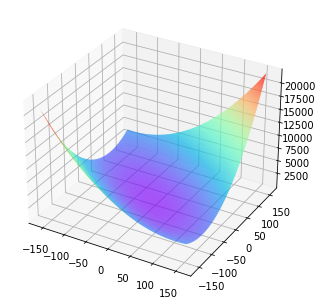

x1 [0.         0.18       0.07344184 0.         0.31481481 0.57750527
 0.64160659 0.26920314 0.         0.22755741 0.28723404 1.
 0.08967991], shape (13,)
y1 [0.42222222], shape (1,)
z1 [130.86954441], shape (1,)
gradient_w0 [0.]
gradient_w1 [23.48051799]
gradient_w2 [9.58029163]
gradient_w_by_sample1 [  0.          23.48051799   9.58029163   0.          41.06674958
  75.33401592  83.69586171  35.11682862   0.          29.68425495
  37.46891169 130.44732219  11.69850434], gradient.shape (13,)
gradient_w_by_sample2 [2.54738434e-02 0.00000000e+00 2.83333765e+01 0.00000000e+00
 1.86624242e+01 5.91703008e+01 8.45121992e+01 3.76793284e+01
 4.69458498e+00 1.23980167e+01 5.97311025e+01 1.07975454e+02
 2.20777626e+01], gradient.shape (13,)
gradient_w_by_sample3 [3.07963708e-02 0.00000000e+00 3.42860463e+01 0.00000000e+00
 2.25832858e+01 9.07287666e+01 7.83155260e+01 4.55955257e+01
 5.68088867e+00 1.50027645e+01 7.22802431e+01 1.29029688e+02
 8.29246719e+00], gradient.shape (13,)
x [[0.00000000

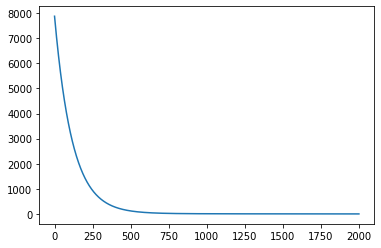

iter 9, loss 5.143394325795511
iter 19, loss 3.097924194225988
iter 29, loss 2.082241020617026
iter 39, loss 1.5673801618157397
iter 49, loss 1.296620473507743
iter 59, loss 1.1453399043319765
iter 69, loss 1.05301557174352
iter 79, loss 0.9902292156463154
iter 89, loss 0.9426576903842502
iter 99, loss 0.9033048096880774
iter 109, loss 0.868732003041364
iter 119, loss 0.837229250968144
iter 129, loss 0.807927474161227
iter 139, loss 0.7803677341465796
iter 149, loss 0.7542920908532762
iter 159, loss 0.7295420168915829
iter 169, loss 0.7060090054240882
iter 179, loss 0.6836105084697766
iter 189, loss 0.6622781710179412
iter 199, loss 0.6419520361168635
iter 209, loss 0.6225776517869489
iter 219, loss 0.6041045903195837
iter 229, loss 0.5864856570315077
iter 239, loss 0.5696764374763879
iter 249, loss 0.5536350125932015
iter 259, loss 0.5383217588525026
iter 269, loss 0.5236991929680567
iter 279, loss 0.509731841376165
iter 289, loss 0.4963861247069634
iter 299, loss 0.48363025234390233


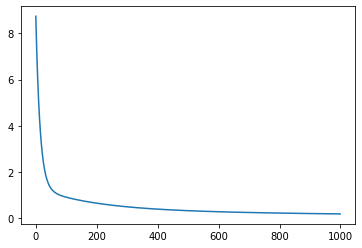

In [1]:
import paddle
from paddle.nn import Linear
import paddle.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

from paddle.vision.datasets import MNIST

train_dataset = MNIST(mode='train')

train_data_0 = np.array(train_dataset[0][0])
train_label_0 = np.array(train_dataset[0][1])

plt.figure("Image")
plt.figure(figsize=(3, 3))
plt.imshow(train_data_0, cmap=plt.cm.binary)
plt.title('image')
plt.show()

print('Image data shape:', train_data_0.shape)
print('Image label:', train_label_0)

class MNIST(paddle.nn.Layer):
    def __init__(self):
        super(MNIST, self).__init__()
        self.fc = paddle.nn.Linear(in_features=784, out_features=1)

    def forward(self, inputs):
        outputs = self.fc(inputs)
        return outputs

model = MNIST()

def train(model):
    model.train()
    train_loader = paddle.io.DataLoader(MNIST(mode='train'), batch_size=16, shuffle=True)
    opt = paddle.optimizer.SGD(learning_rate=0.001, parameters=model.parameters)

    EPOCH_NUM = 10
    lost_list = []
    for epoch in range(EPOCH_NUM):
        for Batch_id, data in enumerate(train_loader()):
            images, labels = data[0], data[1]
            images = norm_img(images).astype('float32')
            labels = labels.astype('float32')

            predicts = model(images)

            loss = F.square_error_cost(predicts, labels)
            avg_loss = paddle.mean(loss)

            if (Batch_id % 600 == 0):
                loss = avg_loss.numpy()[0]
                lost_list.append(loss)
                print('epoch_id:{}, batch_id:{}, loss is :{}', format(epoch, Batch_id, loss))

            avg_loss.backward()
            opt.step()
            opt.clear_grad()

    return lost_list

lost_list = train(model)
